# <center> <span style="font-size:35px;"> Heart Attack </span> </center>
Heart Attack (myocardial infarction) happens when one or more areas of the heart muscle don't get enough oxygen. This happens when blood flow to the heart muscle is blocked.

## Symptoms of Heart Attack:

* Severe pressure, fullness, squeezing, pain, or discomfort in the center of the chest that lasts for more than a few minutes
* Pain or discomfort that spreads to the shoulders, neck, arms, or jaw
* Chest pain that gets worse
* Chest pain that doesn't get better with rest
* Chest pain that happens along with any of these symptoms:
    1. Sweating, cool, clammy skin, or paleness
    2.Shortness of breath
    3.Nausea or vomiting
    4.Dizziness or fainting
    5.Unexplained weakness or fatigue
    6.Rapid or irregular pulse
    

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#f8f0e3;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
Cardiovascular diseases (CVDs) are the leading cause of death globally. An estimated 17.9 million people died from CVDs in 2019, 
representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.<br>
Well it is important to identify risk of heart attack in patients, and treat them with proper medicine to prolong their life.
</p>
</div>

We will use the heart attack dataset containing following parameters, to predict the chances of heart attack in patients:

* Age : Age of the patient
* Sex : Sex of the patient
* exang: exercise induced angina (1 = yes; 0 = no)
* ca: number of major vessels (0-3)
* cp : Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* trtbps : resting blood pressure (in mm Hg)
* chol : cholestoral in mg/dl fetched via BMI sensor
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* rest_ecg : resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved
* target : 0= less chance of heart attack 1= more chance of heart attack

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# EDA

<AxesSubplot:xlabel='output', ylabel='count'>

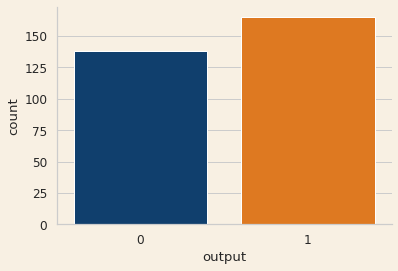

In [7]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1, rc={'axes.facecolor':'#f8f0e3', 'figure.facecolor':'#f8f0e3', "axes.spines.right": False, "axes.spines.top": False})
sns.countplot(x='output', data=df, palette=["#003F7D", "#FD7702"])


In [8]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

As we can see the target variable is not unevenly distributed, so we can use accuracy as the metric for model performance.

In [9]:
#Converting sex column into string representation of male-female to help in visualizations
#Splitting the age column into ranges for neat and clean visualizations
df['range'] = pd.cut(df.age, [0, 10, 20, 30, 40, 50, 60 ,70, 80])
df['M/F'] = df['sex'].apply(lambda x : 'male' if x == 1 else 'female')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


<AxesSubplot:xlabel='M/F', ylabel='count'>

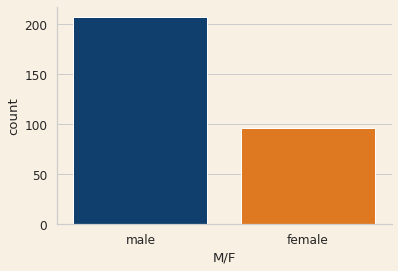

In [10]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1, rc={'axes.facecolor':'#f8f0e3', 'figure.facecolor':'#f8f0e3', "axes.spines.right": False, "axes.spines.top": False})
sns.countplot(x='M/F', data=df, palette=["#003F7D", "#FD7702"])

In [11]:
df['M/F'].value_counts()

male      207
female     96
Name: M/F, dtype: int64

The dataset is unevenly distributed in terms of male-female ratio.

<AxesSubplot:xlabel='range', ylabel='count'>

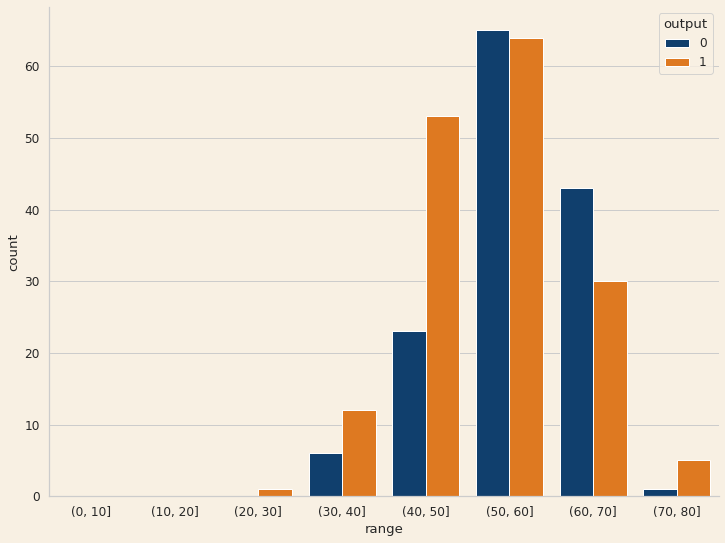

In [12]:
#Age vs output

plt.figure(figsize=(12, 9))
sns.countplot(x='range', data = df, hue='output', palette=["#003F7D", "#FD7702"])

People in the age range of 50-60 have higher chances of heart attack.

<AxesSubplot:xlabel='M/F', ylabel='count'>

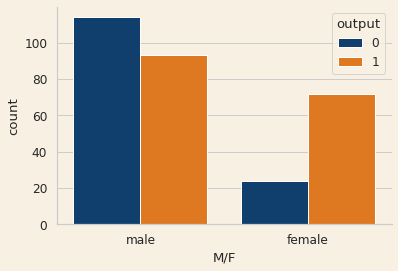

In [13]:
#Sex vs Ouput
sns.countplot(x='M/F', data = df, hue = 'output', palette=["#003F7D", "#FD7702"])

In [14]:
df.groupby(['M/F', 'output'])['output'].count()

M/F     output
female  0          24
        1          72
male    0         114
        1          93
Name: output, dtype: int64

As we can see from the above bar chart, females have more chances of heart attack than compared to male

In [15]:
#age vs chestpain
#age vs resting_blood_pressure
#age vs cholestrol_in_mg/dl
#age vs fasting_blood_sugar
#age vs resting_electrocardiographic
#age vs maximum_heart_rate_acheived

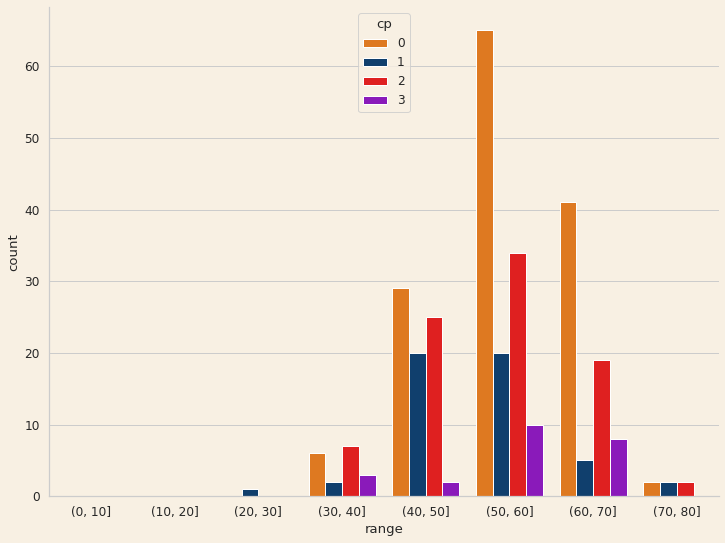

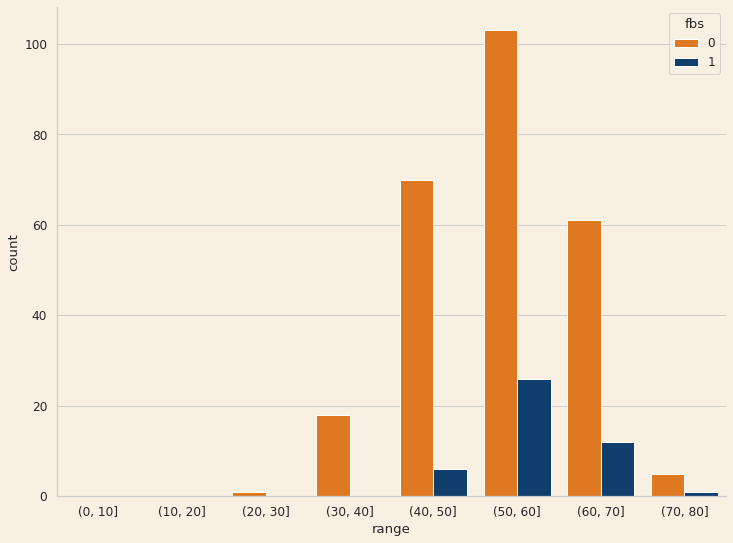

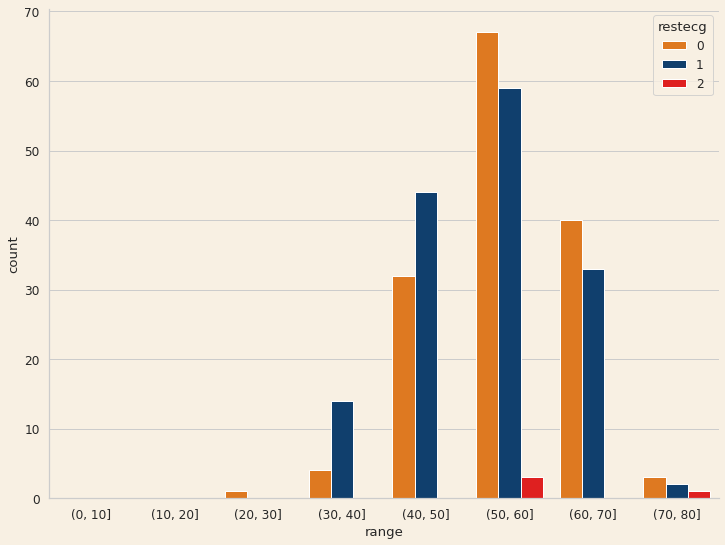

In [16]:
cat_attribute = ['cp','fbs', 'restecg']
num_attribute = ['trtbps', 'chol', 'thalachh']

for i in cat_attribute:
    plt.figure(figsize=(12, 9))
    sns.countplot(x='range', data = df, hue=i, palette=["#FD7702","#003F7D", '#FF0000', '#9400D4'])

As we can see from the above bar chart, people with the age of 50-60 have high chest pain(cp),fasting blood sugar(fbs) and resting electrocardiographic results(restecg).

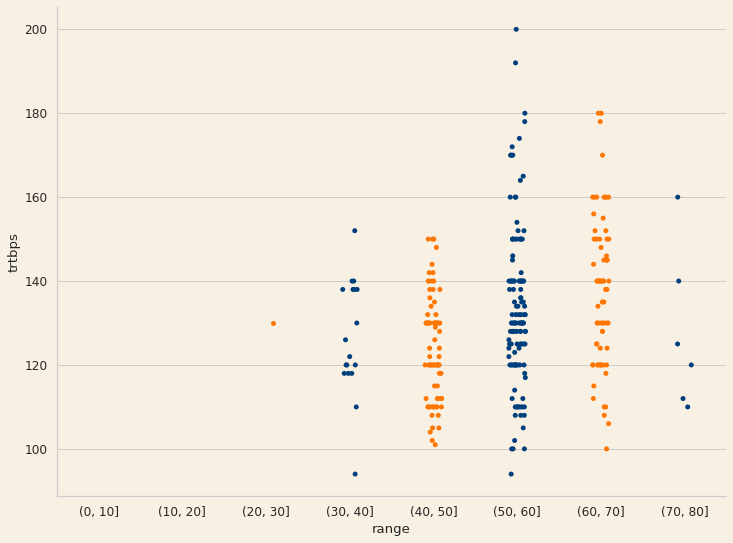

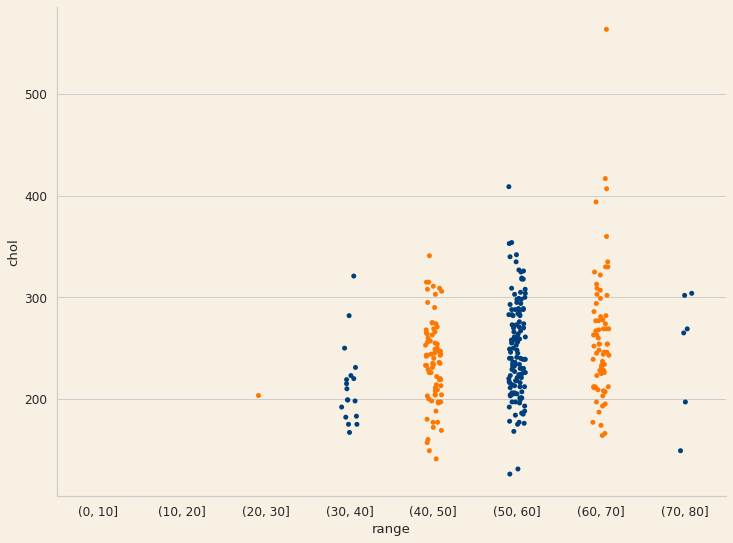

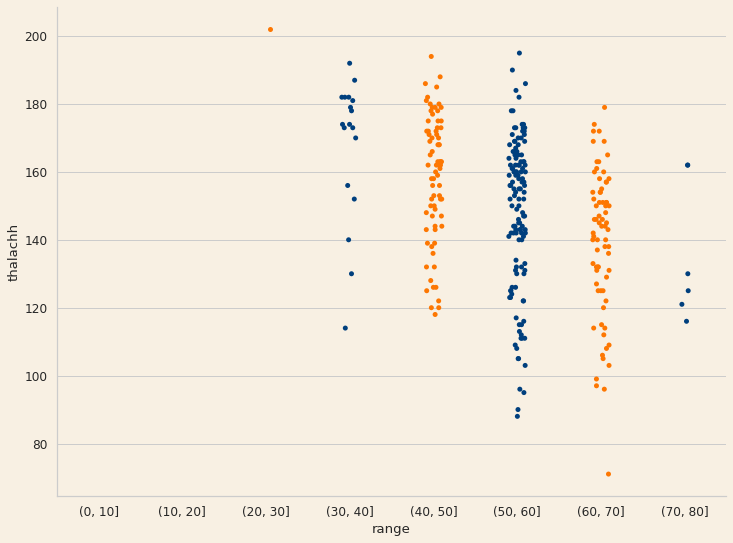

In [17]:
for i in num_attribute:
    plt.figure(figsize=(12, 9))
    sns.stripplot(x='range', y = i, data = df, palette=["#FD7702","#003F7D"])

In [18]:
df.groupby('range')['trtbps', 'chol', 'thalachh'].count()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,trtbps,chol,thalachh
range,,,
"(0, 10]",0,0,0
"(10, 20]",0,0,0
"(20, 30]",1,1,1
"(30, 40]",18,18,18
"(40, 50]",76,76,76
"(50, 60]",129,129,129
"(60, 70]",73,73,73
"(70, 80]",6,6,6


Age group of 50-60 has more instances of people having high resting blood pressure(trtbps), cholestrol(chol) and heart rate(thalachh).                                           

In [19]:
#output vs age
#output vs chestpain
#output vs resting_blood_pressure
#output vs cholestrol_in_mg
#output vs fasting_blood_sugar
#output vs resting_electrocardigraphic
#output vs maximum_heart_rate_acheived
#output vs previous_peak
#output vs number_od_major_vessels

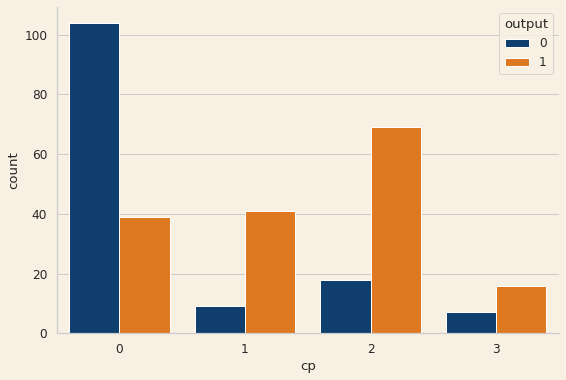

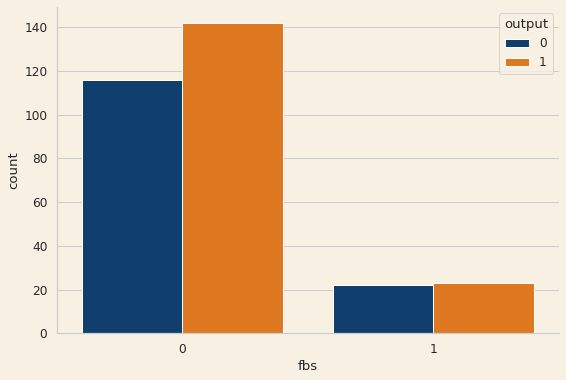

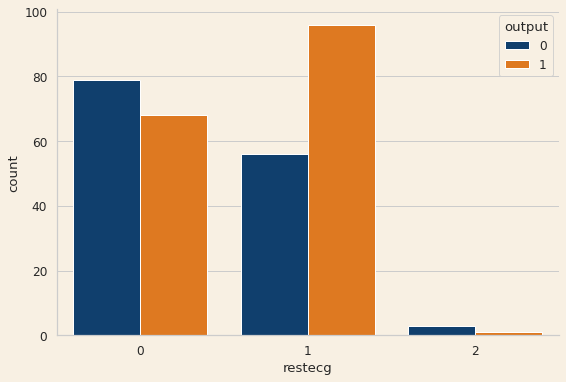

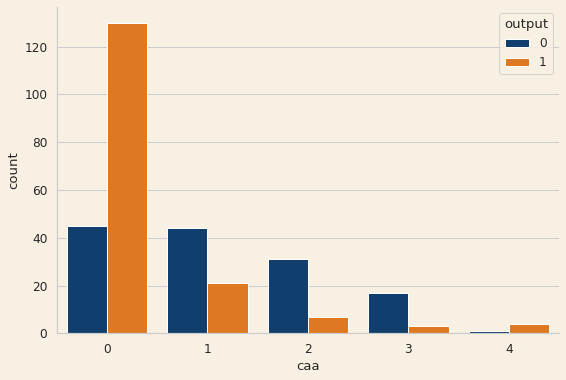

In [20]:
cat_attr = ['cp', 'fbs', 'restecg', 'caa']
num_attr = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

for i in cat_attr:
    plt.figure(figsize=(9, 6))
    sns.countplot(x=i, data = df, hue='output', palette=["#003F7D", "#FD7702"])

* People having chest pain(cp) type 2 : atypical angina have high chances of heart attack.
* People with blood sugar less than 120 mg/dl have chances of heart attack.
* People with resting electrocardiographic results of value 1 : having ST-T wave abnormality have high chances of heart attack.
* People with caa type 0 have high chances of heart attack.

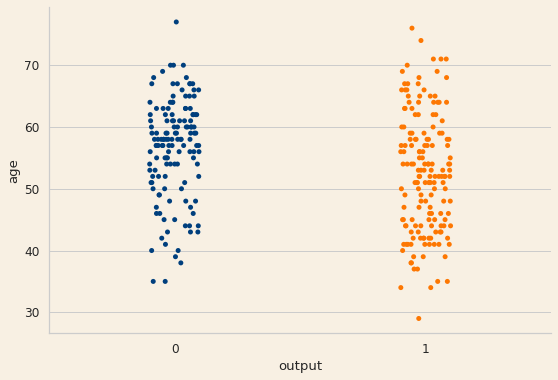

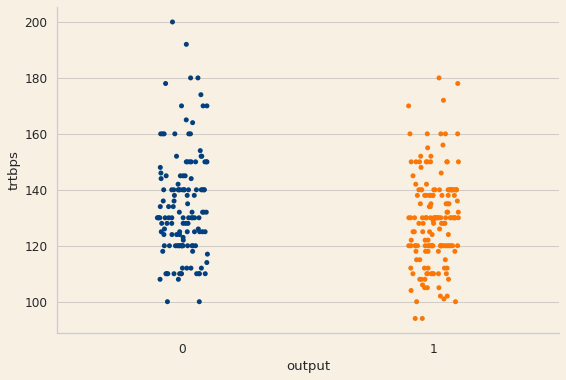

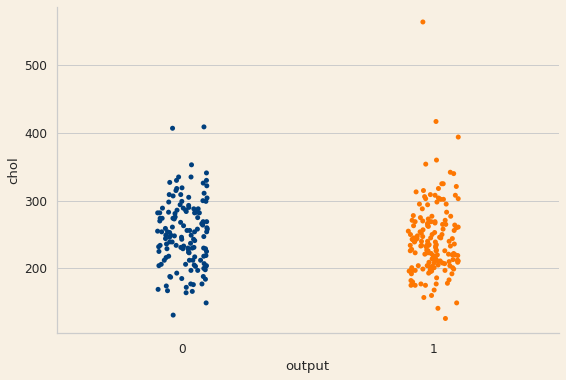

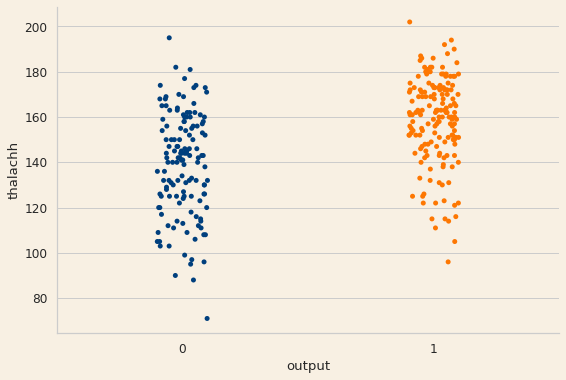

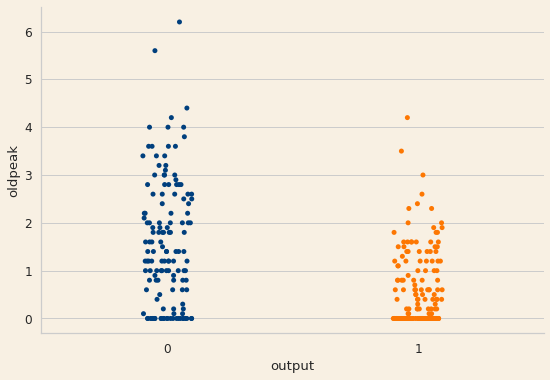

In [21]:
for i in num_attr:
    plt.figure(figsize=(9, 6))
    sns.stripplot(x='output', y = i, data = df, palette=["#003F7D", "#FD7702"])

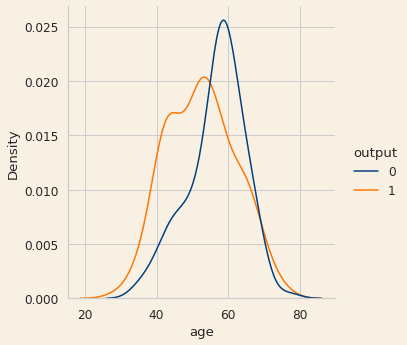

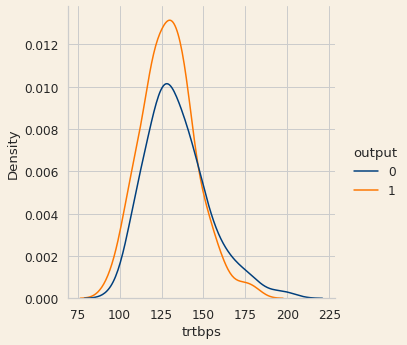

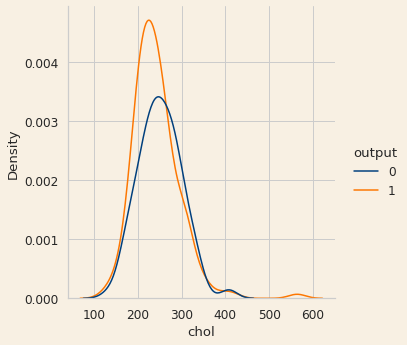

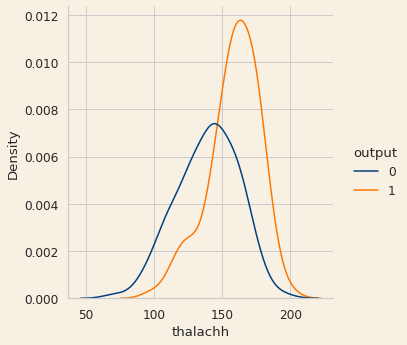

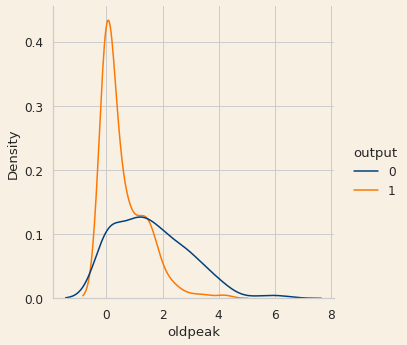

In [22]:
#Distribution of numeric features with the target variable.
parameters = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
for i in parameters:
    sns.displot(x = i, data=df, hue = 'output', kind = 'kde', palette=["#003F7D", "#FD7702"])

In [23]:
#Correlation of features with respect to target variable
corr_matrix = df.corr()
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

<AxesSubplot:>

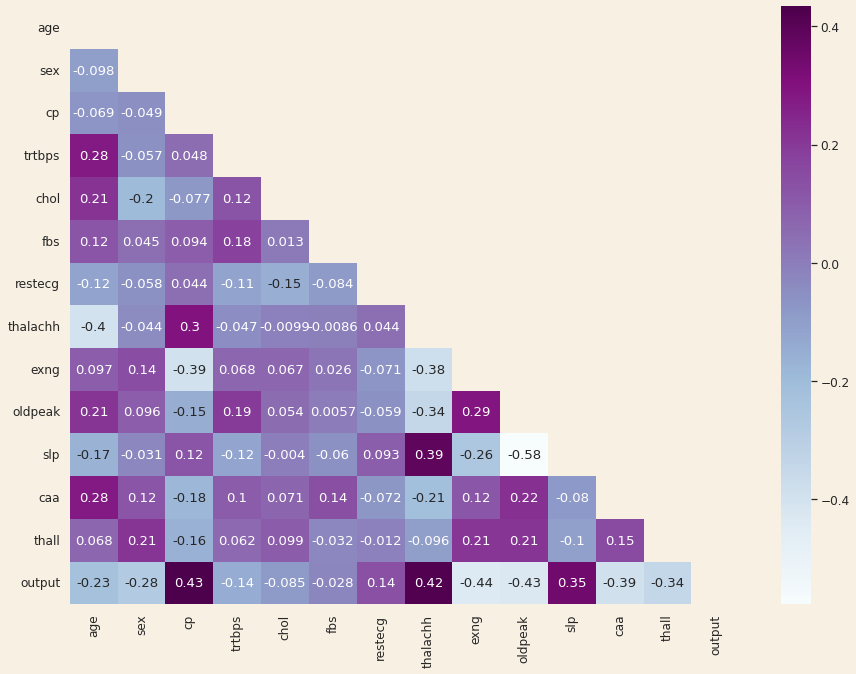

In [24]:
#heatmap
matrix = np.triu(corr_matrix)
plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, mask=matrix, cmap = 'BuPu')

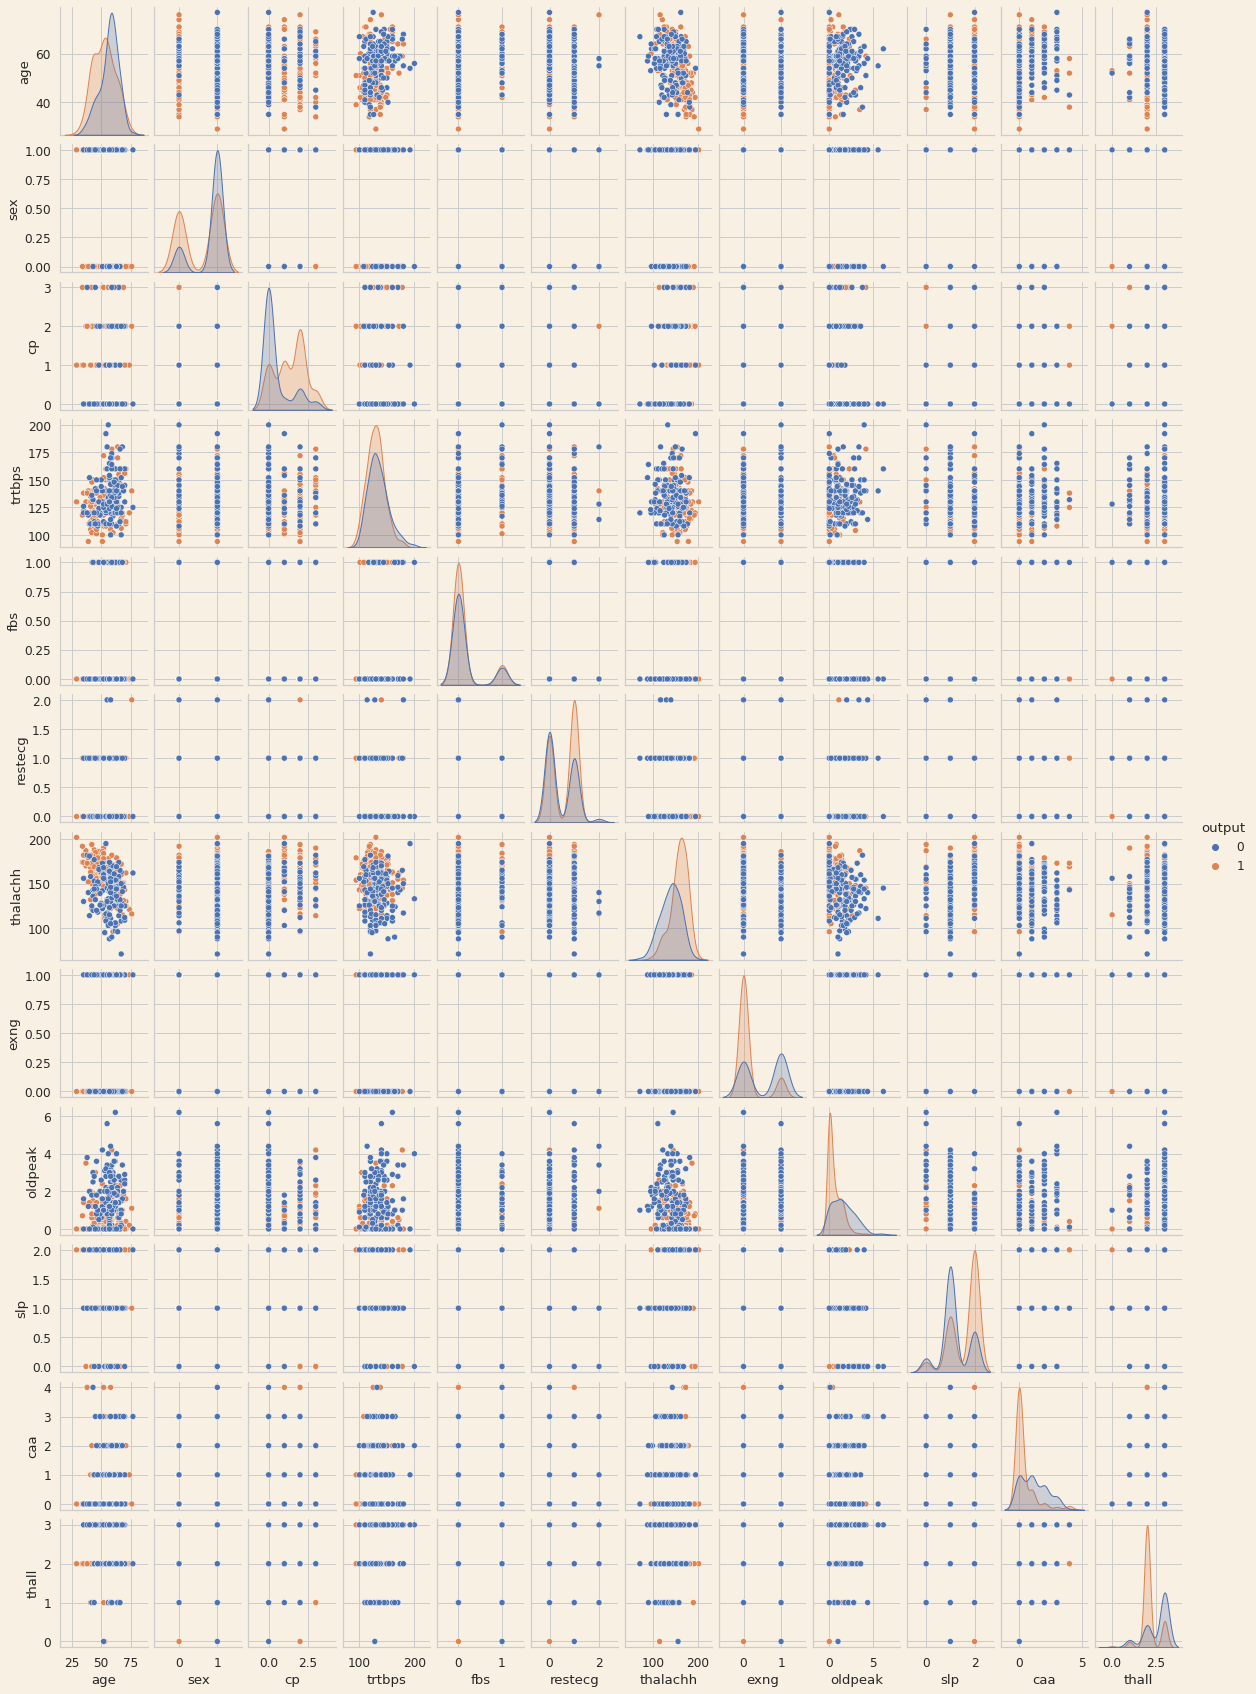

In [25]:
features = ['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
sns.pairplot(df[features], hue = 'output', height = 2, aspect=0.7)

# Model Building

In [26]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,range,M/F
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,"(60, 70]",male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,"(30, 40]",male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,"(40, 50]",female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,"(50, 60]",male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,"(50, 60]",female


In [27]:
#dropping the range and M/F columns added earlier
df = df.drop(['range', 'M/F'], axis = 1)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
#seperating the dependent variable from the independent variable
X = df.drop('output', axis = 1)
y = df['output'].values

In [29]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(drop='first'), [1, 2, 5, 6, 8, 10, 11, 12])], 
                       remainder='passthrough')

X = ct.fit_transform(X)

In [30]:
#spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#applying feature scaling to the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
#logistic regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print(accuracy_score(y_test, y_pred_log))
print('\n')
print(confusion_matrix(y_test, y_pred_log))
print('\n')
print(classification_report(y_test, y_pred_log))


0.9016393442622951


[[27  2]
 [ 4 28]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [33]:
#support vector classification
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred_svc = svc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_svc))
print('\n')
print(confusion_matrix(y_test, y_pred_svc))
print('\n')
print(classification_report(y_test, y_pred_svc))

0.8524590163934426


[[27  2]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [34]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train, y_train)
y_pred_rfc = rfc_clf.predict(X_test)


print(accuracy_score(y_test, y_pred_rfc))
print('\n')
print(confusion_matrix(y_test, y_pred_rfc))
print('\n')
print(classification_report(y_test, y_pred_rfc))

0.8360655737704918


[[25  4]
 [ 6 26]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [35]:
#xgboost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train, eval_metric='error')
y_pred_xgb = xgb_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_xgb))
print('\n')
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print(classification_report(y_test, y_pred_xgb))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8360655737704918


[[26  3]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [36]:
#hyperparaeter tuning of logistic regression
from sklearn.model_selection import GridSearchCV
param_grid_log = {'penalty' : ['l2'], 'C' : [10, 1, 0.1, 0.01, 0.001], 'solver' : ['lbfgs', 'newton-cg']}
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, scoring='accuracy', refit=True, verbose = 2)
grid_log.fit(X_train, y_train)

log_final_model = grid_log.best_estimator_
y_pred_log_tune = log_final_model.predict(X_test)

print(accuracy_score(y_test, y_pred_log_tune))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ................... C=10, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ................... C=10, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ................... C=10, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ................... C=10, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................
[CV] ................... C=10, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ............... C=10, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=10, penalty=l2, solver=newton-cg ..............................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ C=1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ................ C=1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=1, penalty=l2, solver=newton-cg ...............................
[CV] ................ C=1, penalty=l2, solver=newton-cg, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l2, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


In [37]:
#hyperparameter tuning of SVC
from sklearn.model_selection import GridSearchCV
param_grid_svc = {'C': [10, 20, 30, 40, 50, 60, 70], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(SVC(), param_grid_svc, refit=True, scoring = 'accuracy', cv = 3, verbose=2)
grid_svc.fit(X_train, y_train)

svc_final_model = grid_svc.best_estimator_
y_pred_svc_tune = svc_final_model.predict(X_test)

accuracy_score(y_test, y_pred_svc_tune)

Fitting 3 folds for each of 84 candidates, totalling 252 fits
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=20, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=20, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=20, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=20, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=20, gamma=0.1, kernel=poly, total=   0.0s
[CV] C=20, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=20, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=20, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=20, gamma=0.1, kernel=sigmoid, total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=20, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=20, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:    0.9s finished


0.8524590163934426

In [ ]:
#hyperparameter tuning of Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid_rf = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_rf, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
best_random = rf_random.best_estimator_


y_pred_rfc_tune = best_random.predict(X_test)

print(accuracy_score(y_test, y_pred_rfc_tune))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.3s


[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   5.2s
[CV] n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   2.5s
[CV] n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.6s
[CV] n_estimators=1000, mi

In [ ]:
results = pd.DataFrame(columns =['accuracy_score', 'F1 score', 'accuracy_score_after_tuning'], index = ['Logistic Regression', 'Support Vector Classification', 'Random Forest Classifier', 'Xgboost'])

In [ ]:
results.loc['Logistic Regression'] = [accuracy_score(y_test, y_pred_log), round(f1_score(y_test, y_pred_log), 2), accuracy_score(y_test, y_pred_log_tune)]
results.loc['Support Vector Classification'] = [accuracy_score(y_test, y_pred_svc), round(f1_score(y_test, y_pred_svc), 2), accuracy_score(y_test, y_pred_svc_tune)]
results.loc['Random Forest Classifier'] = [accuracy_score(y_test, y_pred_rfc), round(f1_score(y_test, y_pred_rfc), 2), accuracy_score(y_test, y_pred_rfc_tune)]
results.loc['Xgboost'] = [accuracy_score(y_test, y_pred_xgb), round(f1_score(y_test, y_pred_xgb), 2), np.nan ]

In [ ]:
results

#### Well it seems Logistic Regression performs the best in classifying and generalizing with the target variable.

##### Thanks for reading!
##### Your feedbacks and comments would be appreciated.
##### All the best analyzing and modeling data 👍